In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
import numpy as np
import handcalcs.render

In [2]:
data = pd.DataFrame({'Drug Dosage': [8,18,25,34],
                    'Drug Effectiveness':[-10,7,8,-7]})

data['Drug Effectiveness (new)'] = data['Drug Effectiveness'] - 0.5


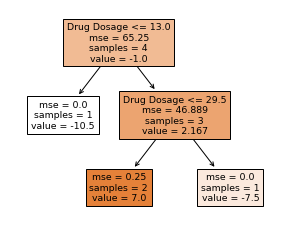

In [3]:
X,y = data[['Drug Dosage']], data['Drug Effectiveness (new)'] 
tree1 = DecisionTreeRegressor(max_depth=2)
tree1 = tree1.fit(X, y)

fig = plt.figure(figsize=(5,4))
_ = tree.plot_tree(tree1, feature_names = X.columns, filled = True)

In [4]:
row1, row2, row3, row4 = np.split(data['Drug Effectiveness (new)'].values,4)

Lambda = 0
numofresiduals = 4

In [5]:
%%render
residual = sum((row1, row2, row3, row4))**2 # total residaul 
similar = residual/(4 + Lambda) # similarity score

<IPython.core.display.Latex object>

In [6]:
row1, row2 = np.split(data['Drug Effectiveness (new)'].values,[1])

In [7]:
%%render
residual = sum((row1))**2 # total residaul 
similar1 = residual/(len(row1) + Lambda) # similarity score for 1st level left leaf

<IPython.core.display.Latex object>

In [8]:
%%render
residual = sum((row2))**2 # total residaul 
similar2 = residual/(len(row2) + Lambda) # similarity score for 1st level right leaf

<IPython.core.display.Latex object>

In [9]:
%%render
gain = similar1 + similar2 - similar

<IPython.core.display.Latex object>

In [10]:
row1, row2 = np.split(data['Drug Effectiveness (new)'][1:].values, [2])

In [11]:
%%render
residual = sum((row1))**2 # total residaul 
similar3 = residual/(len(row1) + Lambda) # similarity score for 2nd level right leaf


<IPython.core.display.Latex object>

In [12]:
%%render
residual = sum((row2))**2 # total residaul 
similar4 = residual/(len(row2) + Lambda) # similarity score for # 2nd level left leaf


<IPython.core.display.Latex object>

In [13]:
gain2 = similar3 +similar4 - similar2
gain2

140.16666666666666

### Gamma and lambda are the two parameters to prune the tree

1. Let us take a look at the lambda, lambda will shrink the size of the similiarity score
- since lambda is in the numerator

2. gamma is the threshold for the gain.

In [21]:
gamma = 130

# we will not remove the first branch, 
# then we compare the root
# since we did not remove the first branch
# we will not remove the root
# then we will not remove the root. 
print(gamma > gain2,  gamma > gain)

gamma = 150
# we  remove the first branch, 
# then we compare the root,
# both branch and root are smaller than gain
# we will not remove the root and branch
print(gamma > gain2, gamma > gain)

False [ True]
True [ True]


In [22]:
learning_rate = 0.3 

output = 0.5 + 0.3 * -10.5
output2 = 0.5 + 0.3*7
output3 = 0.5 +0.3*-7.5
print(output, output2, output3)


-2.65 2.6 -1.75


In [23]:
# using the new prediction, the residual is smaller than before,
# we take another step toward right direction, 
# We build another tree based on the residual, and predict those residual on the second tree
# we repeat the process until we reach the maximum numbers of trees or residual is small enough